In [55]:
import sys
import tweepy
sys.path.insert(1, '../../')
import keys
from datetime import datetime
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from unidecode import unidecode

%matplotlib inline

In [9]:
#api conf
auth = tweepy.OAuthHandler(keys.cos_pub, keys.cos_sec)
auth.set_access_token(keys.as_pub, keys.as_sec)

api = tweepy.API(auth)


In [11]:
#getting data
search_terms = ["notebook", 'celular', 'câmera', 'iphone', 'câmera', 'smartwatsh', 'memória', 'ventilador', 'aplicativo']
def twitter_search(terms):
    tmp_search_result = []
 
    for e in search_terms:
        partial_result = [];
        api_result = api.search(q=e, tweet_mode='extended', count=100, lang='pt', retweeted=False, reply=False)

        for prop in api_result:
            partial_result.append(prop._json['full_text'])
        tmp_search_result.extend(partial_result)
        
    return tmp_search_result
search_result = twitter_search(search_terms)
search_result

['@lucasdebelmont @pharaujo85 @opropriolavo Além de ouvir a rádio citada, posso assistir pela smartv, pelo celular, tablet, notebook, computador...',
 'RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4',
 'Fiquei catando meus vídeos e fotos antigos do iCloud depois o sorriso pediu pra eu fazer um favor pra ele e eu mais de 5 horas com a cara no notebook era só o que eu precisava pra está louca de dor de cabeça agr 🤦🏾\u200d♀️',
 '@iuris_man Pede para alguém tirar o hd e testar em outro notebook ou pc.',
 'RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado é o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4',
 '@CarlosBolsonaro @augustosnunes Falou o cuzão que fica na Internet com uma arma ao lado do notebook....vai tomar Todynho e comer Ana Maria!!!!',
 'meu celular morreu tive que ir fazer orçamento do meu notebook que tb deu pipitchu n ta facil armygos',
 'Spotify no 

In [12]:
#saving data in a txt file
file_path = '../datasets/tweets/{0}.txt'.format(datetime.now())
with open(file_path, 'wb') as file:
    for e in search_result:
        #testar depois tirando \ns
        entry = '{0}\n || \n '.format(e.splitlines()) #tweet separator
        file.write(entry.encode())
    file.close()

In [56]:
# juntando todas as palavras e removendo \n
group_text = ''.join(''.join(search_result).splitlines())
group_text = unidecode(group_text)
group_text

'@lucasdebelmont @pharaujo85 @opropriolavo Alem de ouvir a radio citada, posso assistir pela smartv, pelo celular, tablet, notebook, computador...RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado e o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4Fiquei catando meus videos e fotos antigos do iCloud depois o sorriso pediu pra eu fazer um favor pra ele e eu mais de 5 horas com a cara no notebook era so o que eu precisava pra esta louca de dor de cabeca agr [?]@iuris_man Pede para alguem tirar o hd e testar em outro notebook ou pc.RT @bullshhhit: mexer no notebook dentro de casa com uma arma do lado e o maior conceito de micropenis ja visto https://t.co/fPhq0LVNv4@CarlosBolsonaro @augustosnunes Falou o cuzao que fica na Internet com uma arma ao lado do notebook....vai tomar Todynho e comer Ana Maria!!!!meu celular morreu tive que ir fazer orcamento do meu notebook que tb deu pipitchu n ta facil armygosSpotify no notebook e uma DISGRACAAAAEssa merda trava 

In [76]:
#filtrando
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.extend(['', 'rt'])#tirando espaços vazios e marcas de retweet
words_list = group_text.split()
words_list = [e.strip().strip(string.punctuation).lower() for e in words_list]
words_list = [e for e in words_list if e not in stop_words]#tirando stop words
words_list = [e for e in words_list if e[:5] != "https" and e[0] !=  '@']#tirando links e menções 


words_list

['lucasdebelmont',
 'pharaujo85',
 'opropriolavo',
 'alem',
 'ouvir',
 'radio',
 'citada',
 'posso',
 'assistir',
 'smartv',
 'celular',
 'tablet',
 'notebook',
 'computador...rt',
 'bullshhhit',
 'mexer',
 'notebook',
 'dentro',
 'casa',
 'arma',
 'lado',
 'maior',
 'conceito',
 'micropenis',
 'ja',
 'visto',
 'catando',
 'videos',
 'fotos',
 'antigos',
 'icloud',
 'sorriso',
 'pediu',
 'pra',
 'fazer',
 'favor',
 'pra',
 '5',
 'horas',
 'cara',
 'notebook',
 'so',
 'precisava',
 'pra',
 'louca',
 'dor',
 'cabeca',
 'agr',
 'iuris_man',
 'pede',
 'alguem',
 'tirar',
 'hd',
 'testar',
 'outro',
 'notebook',
 'pc.rt',
 'bullshhhit',
 'mexer',
 'notebook',
 'dentro',
 'casa',
 'arma',
 'lado',
 'maior',
 'conceito',
 'micropenis',
 'ja',
 'visto',
 'augustosnunes',
 'falou',
 'cuzao',
 'fica',
 'internet',
 'arma',
 'lado',
 'notebook....vai',
 'tomar',
 'todynho',
 'comer',
 'ana',
 'maria!!!!meu',
 'celular',
 'morreu',
 'ir',
 'fazer',
 'orcamento',
 'notebook',
 'tb',
 'deu',
 'pipit

In [77]:
#termos mais frequentes
frequence_list = Counter(words_list)
frequence_list.most_common(20)

[('nao', 193),
 ('celular', 169),
 ('camera', 155),
 ('pra', 143),
 ('ta', 116),
 ('iphone', 105),
 ('notebook', 99),
 ('to', 93),
 ('taxi', 84),
 ('memoria', 82),
 ('so', 79),
 ('aplicativo', 79),
 ('ventilador', 76),
 ('ja', 60),
 ('disse', 56),
 ('q', 55),
 ('voce', 52),
 ('pai', 50),
 ('ai', 50),
 ('vc', 43)]

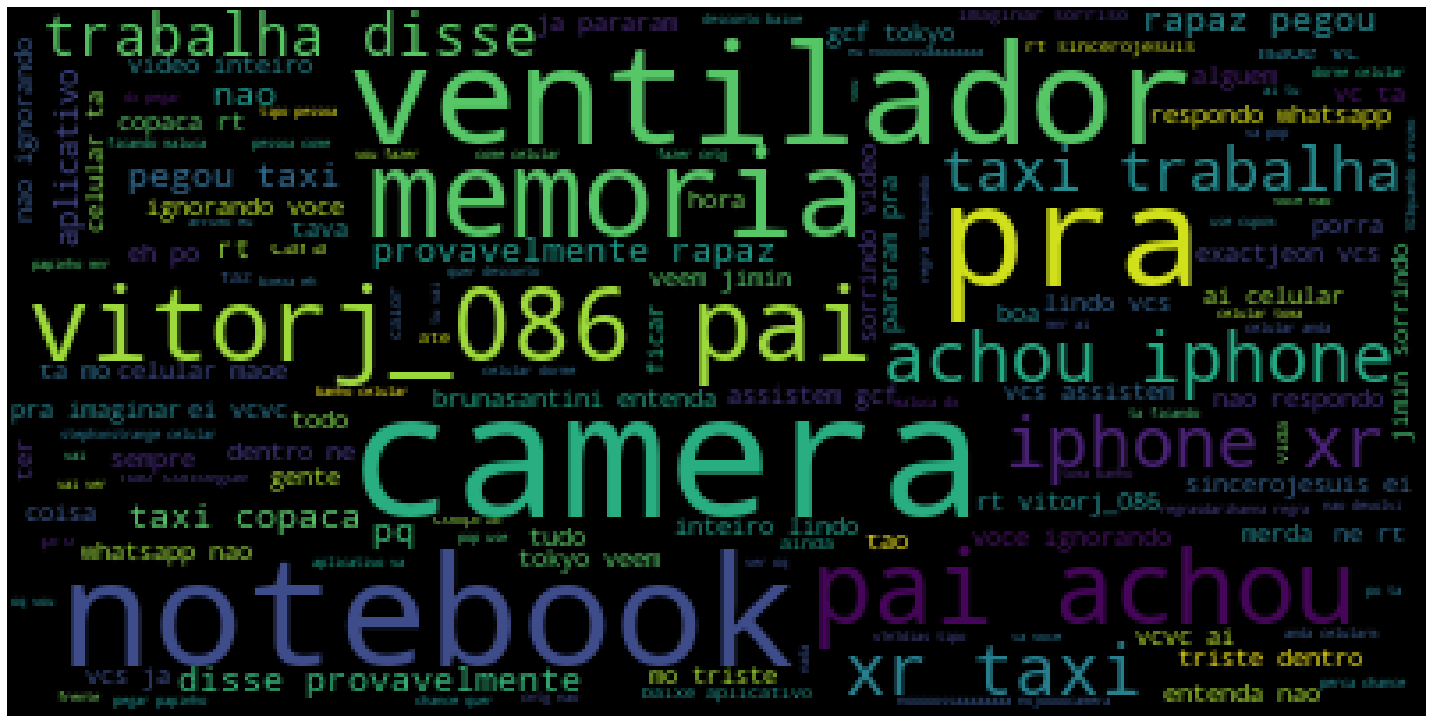

In [78]:
filtered_words = ' '.join(words_list)
word_cloud = WordCloud(max_font_size=50).generate(filtered_words)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(word_cloud, interpolation='nearest')
plt.axis("off")
plt.tight_layout()
plt.show()

In [92]:
#algoritmo que mostra contextos
filtered_words_arr = filtered_words.split(' ')
expression = "ventilador"

positions = [] #localização onde a plavra se encontra
for i, e in enumerate(filtered_words_arr):
    if expression == e:
        positions.append(i)

print(len(positions))
print(positions)

76
[7095, 7106, 7121, 7130, 7135, 7161, 7211, 7226, 7231, 7239, 7244, 7265, 7326, 7338, 7348, 7395, 7408, 7431, 7439, 7450, 7474, 7489, 7506, 7522, 7539, 7567, 7574, 7587, 7606, 7647, 7659, 7678, 7688, 7700, 7711, 7738, 7747, 7763, 7776, 7787, 7793, 7803, 7807, 7816, 7820, 7836, 7843, 7856, 7874, 7896, 7912, 7956, 7981, 8007, 8010, 8018, 8026, 8035, 8078, 8090, 8100, 8106, 8116, 8126, 8168, 8186, 8189, 8210, 8222, 8237, 8251, 8264, 8279, 8288, 8302, 8315]


In [93]:
neighbors = 2
for e in positions[0:30]:
    print(filtered_words_arr[e-neighbors : e+neighbors])

['ir', 'compra', 'ventilador', 'amanha']
['escola', 'publica', 'ventilador', 'cair']
['serpente', 'espelho', 'ventilador', 'amor']
['tamarindo', 'abelha', 'ventilador', 'kkkkkkkk']
['hoje', 'derrubaram', 'ventilador', 'tudo']
['soltava', 'pipa', 'ventilador', 'chamou']
['n', 'ligar', 'ventilador', 'pq']
['pobre', 'to', 'ventilador', 'quase']
['kkkk', 'quintadetremurasdvba', 'ventilador', 'cara']
['pos', 'banho', 'ventilador', 'teto']
['caminho', 'voltaaaaaameu', 'ventilador', 'vez']
['ventiladorcheguei', 'casa', 'ventilador', 'ta']
['bom', 'ligar', 'ventilador', 'cobrir']
['vc', 'liga', 'ventilador', 'vc']
['passada', 'derretendo', 'ventilador', 'ligadohoje']
['merda', 'ventilador....tava', 'ventilador', 'ligado']
['pra', 'desligar', 'ventilador', 'pq']
['deito', 'ligo', 'ventilador', 'naoseila']
['cima', 'bateu', 'ventilador', 'teto']
['chuveiro', 'c', 'ventilador', 'c']
['escola', 'publica', 'ventilador', 'cair']
['flanela', 'armario', 'ventilador', 'ovos']
['pro', 'alto', 'ventilado